# Домашнее задание №3.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import beta
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

## ***Задача 1: распределение верхних экстремумов для показательной модели (2 балла)***

### **1.** Зафиксируйте $n$.

In [52]:
n = 100

### **2.** Сгенерируйте $K = n^2$ выборок $(X_1^k, X_2^k, ... , X_n^k)$ объема $n$ из экспоненциального распределения $\operatorname{Exp}(1)$. В каждой из $K$ выборок определить максимум $X_{(n)}^k$, $1 \le k \le n$.

In [53]:
K = n ** 2
lambda_ = 1
samples = []
sorted_samples = []
n_order_statistics = []
for i in range(K):
    samples.append(expon.rvs(scale=1 / lambda_, size=n))

for i in range(K):
    sorted_samples.append(sorted(samples[i]))
    n_order_statistics.append(sorted_samples[i][-1])

### **3.** Вычислите функцию \begin{equation}
    \hat G_K(x) = \cfrac{1}{K} \sum\limits_{k=1}^{K}\mathbb{1}\left(X_{(n)}^k - \ln n \le x \right), \;\;\; x \ge 0.
\end{equation} и постройте графики зависимостей $\hat G_K(x)$ и $G(x) = e^{-e^{-x}}$ от $x$.

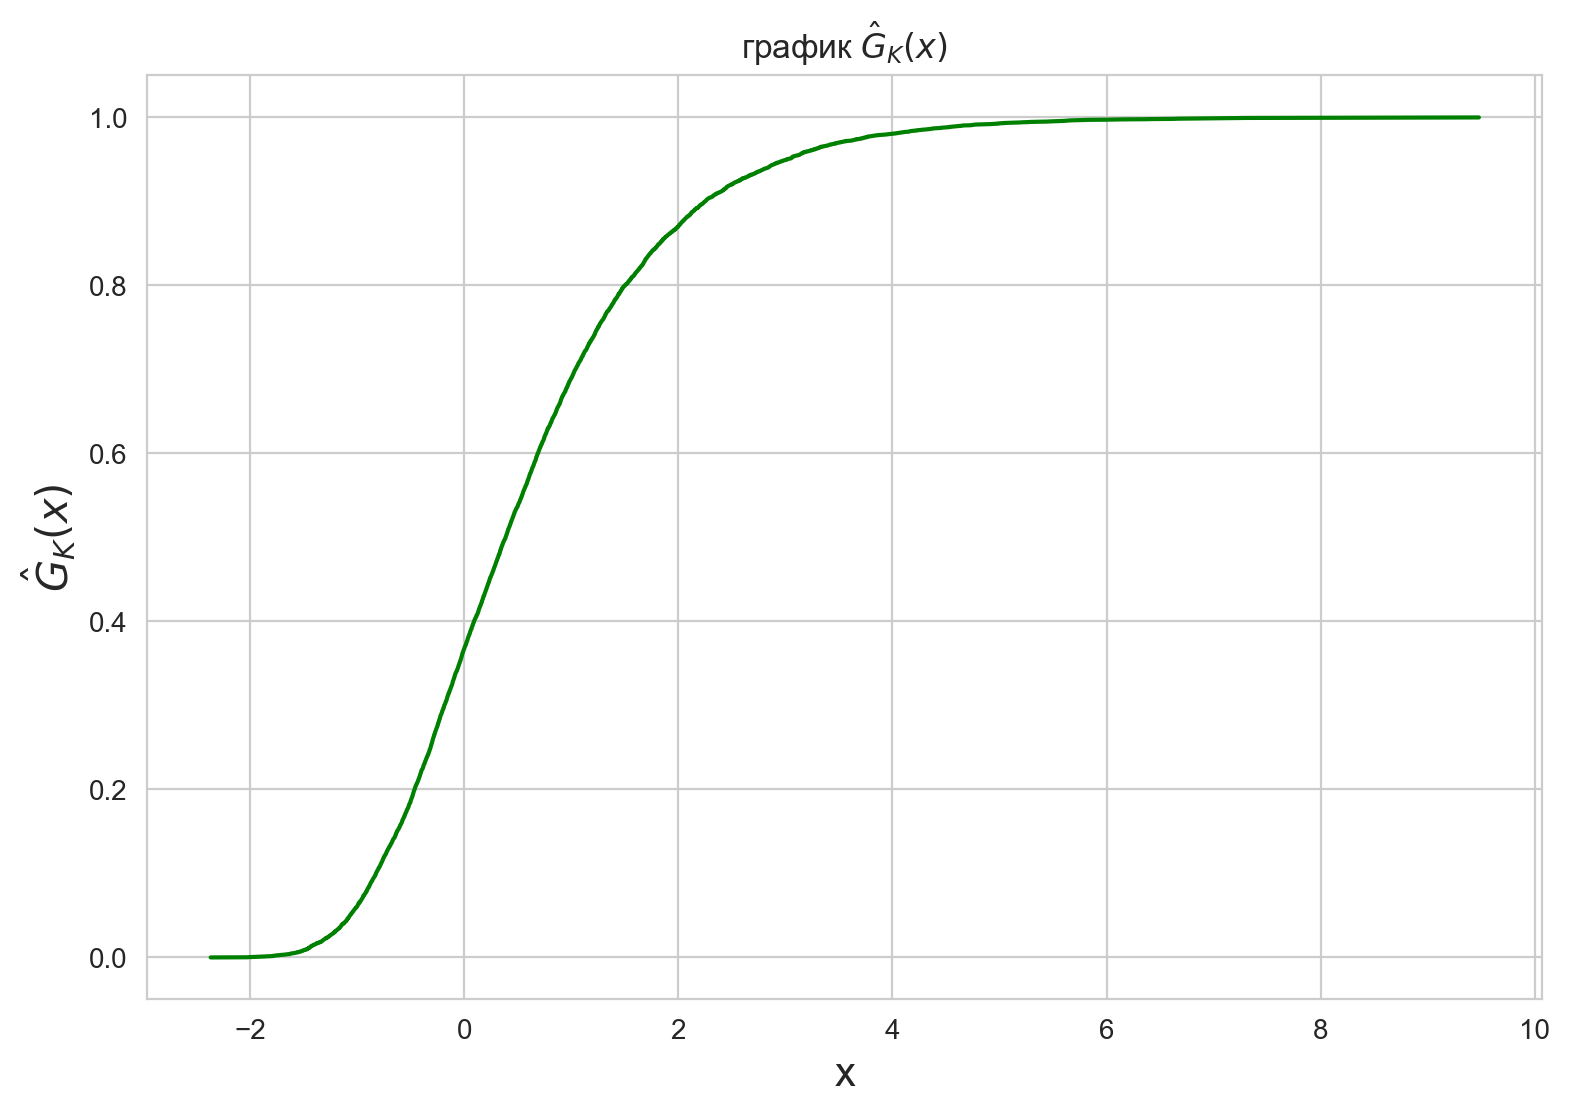

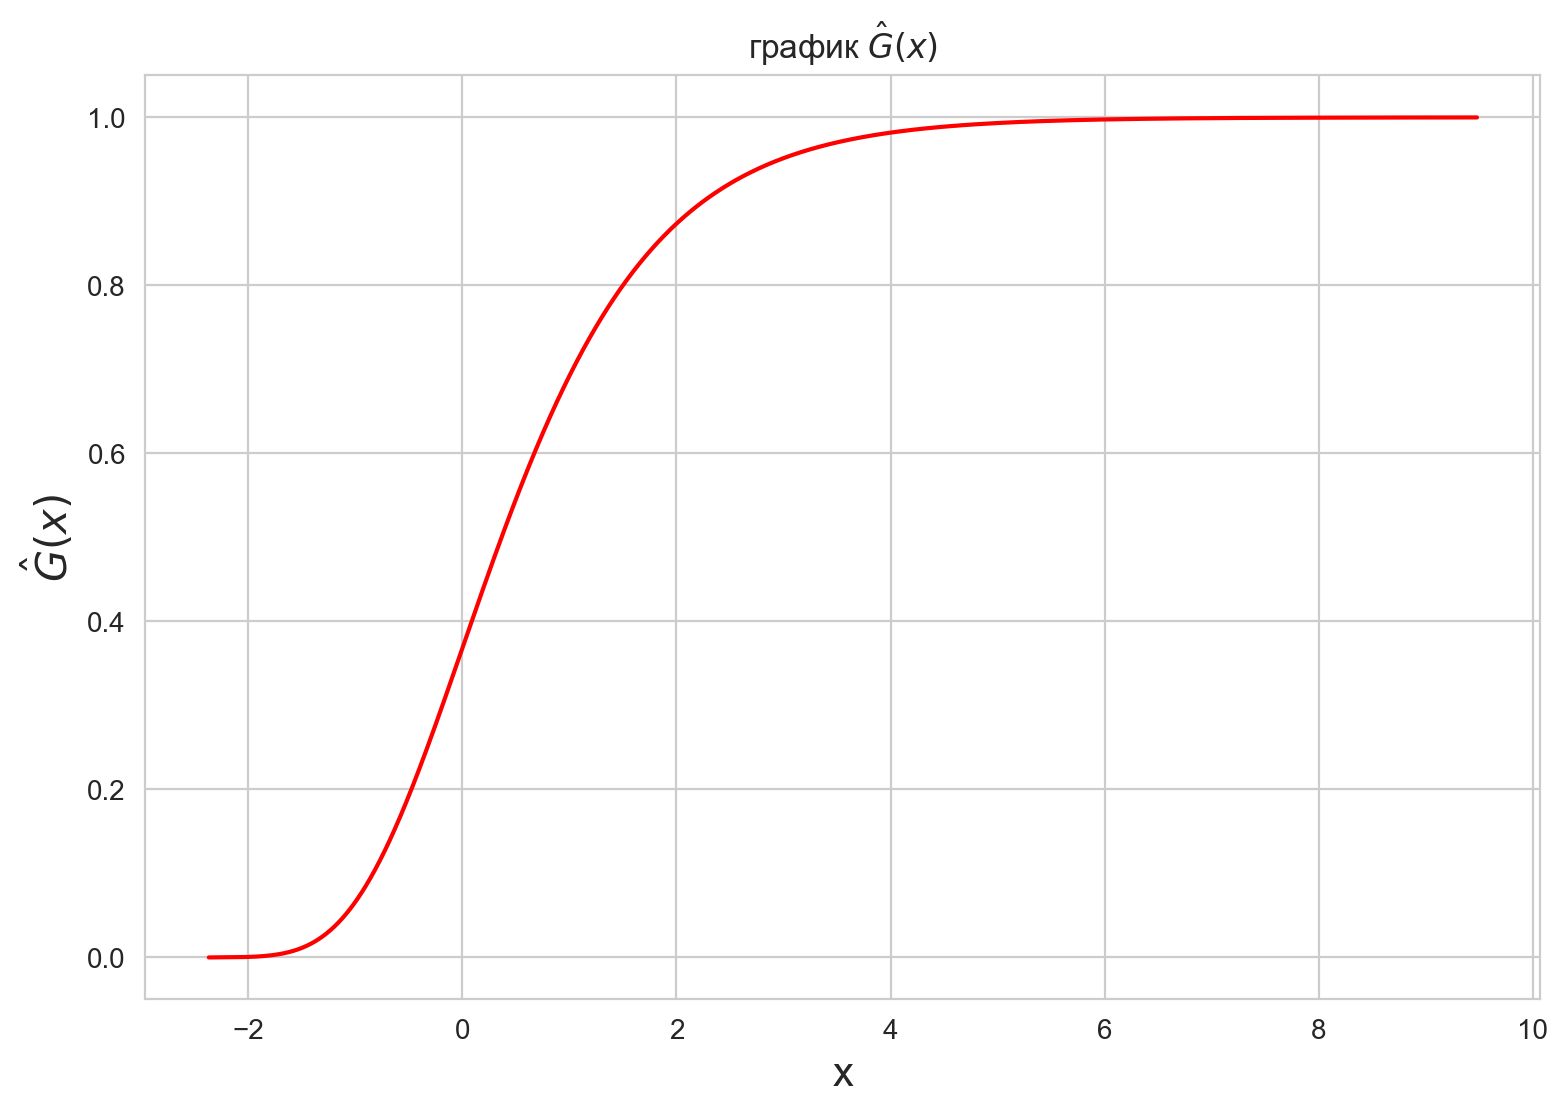

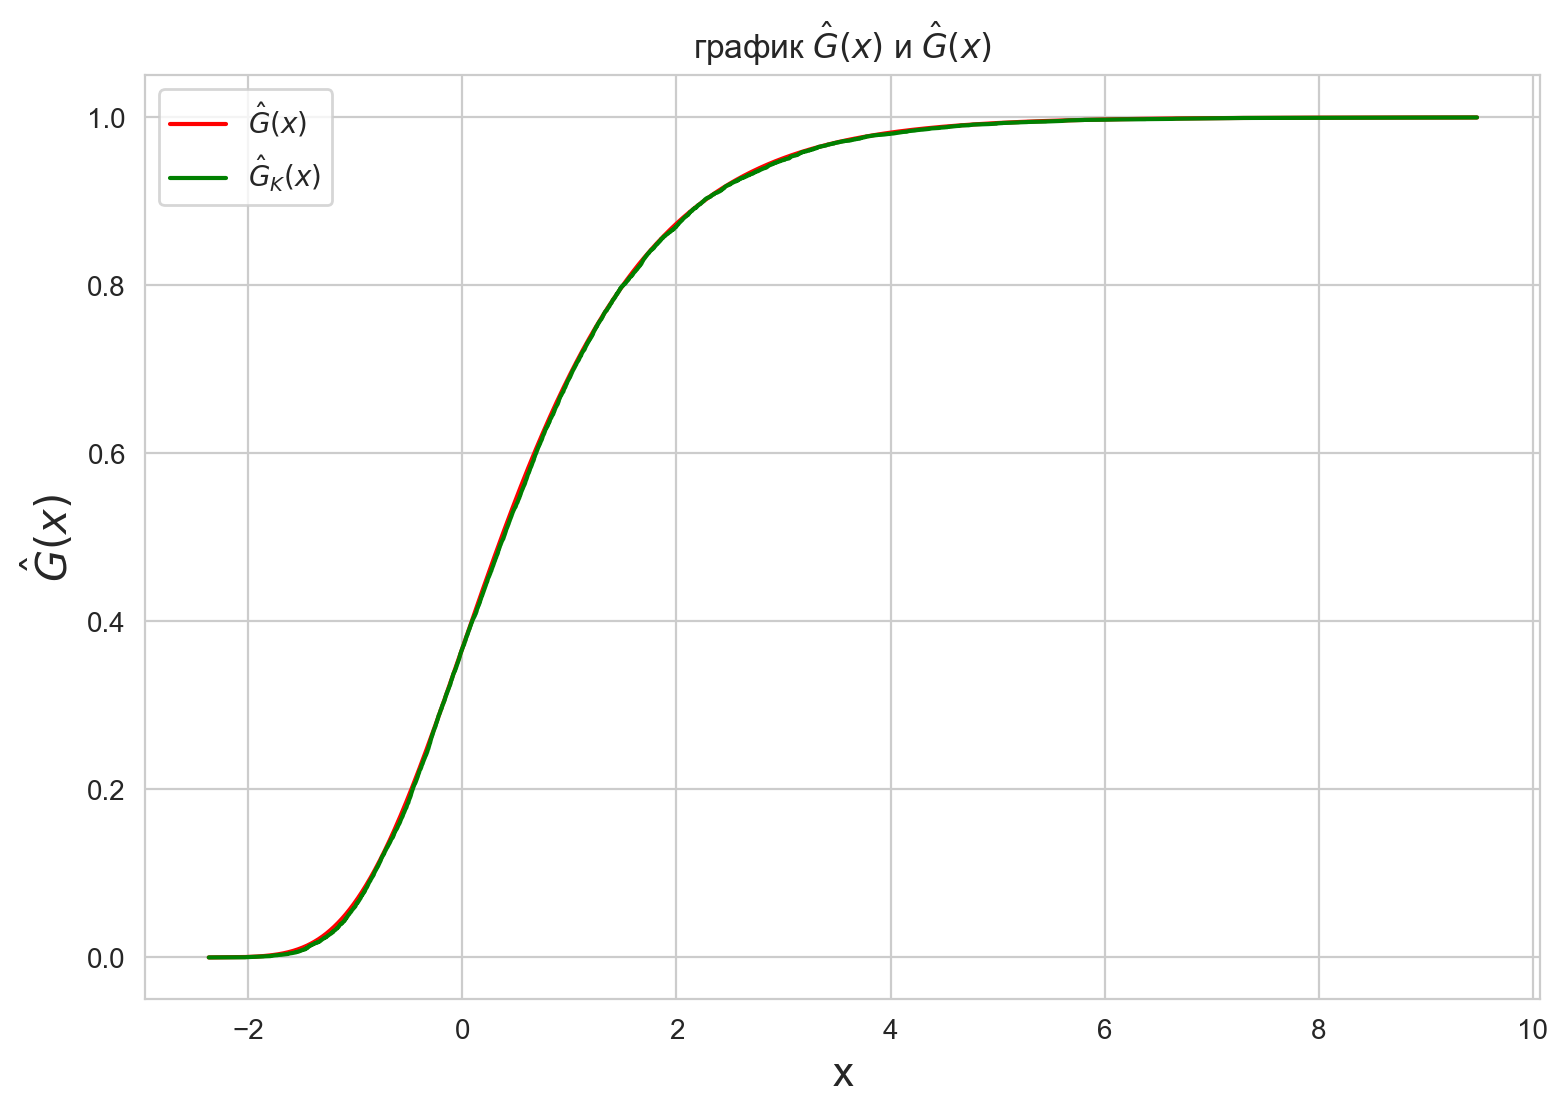

In [54]:
G_K_x = []
G_x = []
x = sorted(n_order_statistics)
b = np.log(n)

for i in range(len(x)):
    x[i] -= b

for i in range(len(x)):
    G_K_x.append(i / K)
    G_x.append(np.exp(-np.exp(-x[i])))

fig_1, ax_1 = plt.subplots(figsize=(9, 6))
plt.plot(x, G_K_x, color='green')
plt.title("график $\hat G_K(x)$")
plt.xlabel('x', fontsize=15)
plt.ylabel('$\hat G_K(x)$', fontsize=15)

fig_2, ax_2 = plt.subplots(figsize=(9, 6))
plt.plot(x, G_x, color='red')
plt.title("график $\hat G(x)$")
plt.xlabel('x', fontsize=15)
plt.ylabel('$\hat G(x)$', fontsize=15)

fig_3, ax_3 = plt.subplots(figsize=(9, 6))
plt.plot(x, G_x, color='red')
plt.plot(x, G_K_x, color='green')
plt.title("график $\hat G(x)$ и $\hat G(x)$")
plt.xlabel('x', fontsize=15)
plt.ylabel('$\hat G(x)$', fontsize=15)
plt.legend(labels=['$\hat G(x)$', '$\hat G_K(x)$'])

plt.show()

### **4.** Убедитесь, что $\hat G_K$ близка к $G(x) = e^{-e^{-x}}$. Для этого вычислите \begin{equation}
    T_K = \operatorname{sup}\limits_{x \ge 0} \left| \hat G_K(x) - G(x) \right|.
\end{equation} Обратите внимание, что $\hat G_K$ -- кусочно постоянная функция, а G - монотонная. Поэтому значение статистики $T_K$ можно найти точно.

In [12]:
T_k = 0
for i in range(len(x)):
    T_k = max(T_k, abs(G_x[i] - G_K_x[i]))
print('T_k =', T_k)

T_k = 0.006368586635929041


### **5.** Повторите задания пп. 1, 2 и 4 при различных $n$. Постройте график зависимости $T_K$ от $n$. Необходимо взять не менее $10$ различных значений $n$. Графики функций $\hat G_K$ и $G$ (см. п.3) можно построить при одном фиксированном значении $n$ на Ваш выбор.

In [13]:
def T_k_n(n):
    K = n ** 2
    lambda_ = 1
    samples = []
    sorted_samples = []
    n_order_statistics = []
    for i in range(K):
        samples.append(expon.rvs(scale=1 / lambda_, size=n))

    for i in range(K):
        sorted_samples.append(sorted(samples[i]))
        n_order_statistics.append(sorted_samples[i][-1])

    G_K_x = []
    G_x = []
    x = sorted(n_order_statistics)
    b = np.log(n)

    for i in range(len(x)):
        x[i] -= b

    for i in range(len(x)):
        G_K_x.append(i / K)
        G_x.append(np.exp(-np.exp(-x[i])))

    T_k = 0
    for i in range(len(x)):
        T_k = max(T_k, abs(G_x[i] - G_K_x[i]))

    return T_k

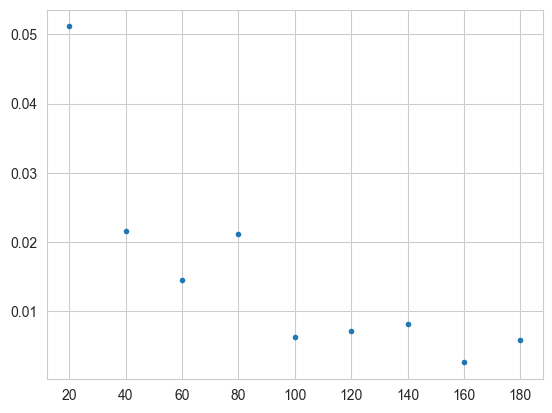

In [14]:
N = np.arange(20, 200, 20)
T_K = []
for n in N:
    T_K.append(T_k_n(n))
plt.plot(N, T_K, '.')
plt.show()

## ***Задача 2: квадратичные формы гауссовских случайных векторов с идемподентными матрицами (4 балла)***

### **1.** Зафиксируйте $n \in \mathbb{N}$ и натуральное $r$ от $2$ до $(n - 1)$.

In [15]:
n = 100

### **2.** Выберите симметричную идемпотентную матрицу $A$ ранга $r$ (то есть симметричную матрицу ранга $r$, удовлетворяющую равенству $A^2 = A$). Матрица не должна быть диагональной. В замечании 2 описан один из способов получения такой матрицы, но Вы можете воспользоваться и другими на Ваше усмотрение.

In [16]:
r = 80
columns = []

for i in range(r):
    vec = []
    for j in range(n):
        vec.append(uniform.rvs(loc=-1000, scale=2000))
    vec_copy = vec.copy()
    for j in range(len(columns)):
        vec -= np.dot(vec_copy, columns[j]) * columns[j]
    columns.append(vec / np.linalg.norm(vec))

columns[0] = np.array(columns[0])

Q = np.matrix(columns)
Q = Q.T
A = Q @ Q.T
print(np.linalg.norm(A @ A - A, 'fro'))

1.0004755986654992e-14


### **3.** Сгенерируйте $K = n^2$ случайных векторов $X_1, X_2, ... , X_K \in \mathbb{R}^n$ из нормального распределения $\mathcal{N}(0, I_n)$. 

In [17]:
K = n ** 2
mu, sigma = 0, 1
samples = []
for i in range(K):
    sample = np.random.normal(mu, sigma, n)
    samples.append(sample)

### **4.** По набору наблюдений $X_1^\top AX_1, ..., X_K^\top AX_K$ постройте гистограмму. На тот же рисунок добавьте график плотности распределения $\chi^2(r)$.

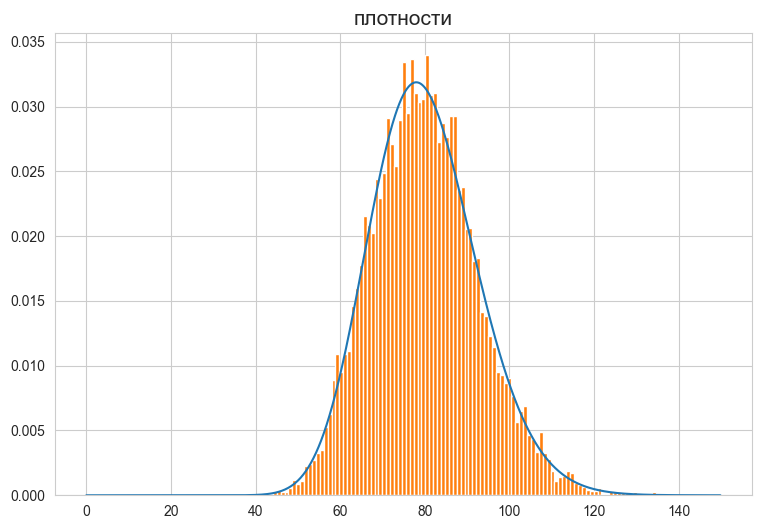

In [18]:
values = []
for i in range(K):
    values.append((samples[i].T @ A @ samples[i]).item())

fig, ax = plt.subplots(figsize=(9, 6))
X = np.arange(0, 150, 0.1)
plt.plot(X, chi2.pdf(X, r))

ax.set_title('плотности', fontsize=15)
plt.hist(values, bins=100, density=True)

plt.show()

### **5.** убедитесь, что эмперическая функция распределения \begin{equation}
    \hat F_K(t) = \cfrac{1}{K}\sum\limits_{k=1}^{K} \mathbb{1}\left( X_k^\top AX_k \le t \right), \;\;\; t \ge 0, \end{equation} 
### близка к функции распределения $\chi^2(r)$. Для этого вычислите \begin{equation} T_K = \operatorname{sup}\limits_{t \ge 0}\left| \hat F_K(t) - G_r(t)\right|, \end{equation} где $G_r(t)$ - функция распределения $\chi^2(r)$ (доступна в библиотеке scipy). Обратите внимание, что $\hat F_K$ -- кусочно постоянная функция, а $G_r$ - монотонная. Поэтому значение статистики $T_K$ можно найти точно.

In [23]:
F_x = []
x = sorted(values)

for i in range(len(x)):
    F_x.append(i / K)

# fig, ax = plt.subplots(figsize=(9, 6))

# plt.plot(x, chi2.cdf(x, r), color='green')
# plt.plot(x, F_x, color='red')

T_k = 0
for i in range(len(x)):
    T_k = max(T_k, abs(F_x[i] - chi2.cdf(x[i], r)))
print("T_k = ", T_k)

T_k =  0.007969533797992034


### **6.** Повторите задания пп. 1, 2, 3, 5 при различных значениях $r$ и $n$. При каждом $r$ постройте график зависимости $T_K$ от $n$. Убедитесь, что значение $T_K$ стремится к нулю с ростом $n$. Необходимо выбрать не менее трёх различных значений $r$ и не менее $10$ различных значений $n$. Гистограмму (см. п. 4) можно построить при одном фиксированном значении $n$ на Ваш выбор.

In [34]:
def T_k(n, r):
    columns = []

    for i in range(r):
        vec = []
        for j in range(n):
            vec.append(uniform.rvs(loc=-1000, scale=2000))
        vec_copy = vec.copy()
        for j in range(len(columns)):
            vec -= np.dot(vec_copy, columns[j]) * columns[j]
        columns.append(vec / np.linalg.norm(vec))

    columns[0] = np.array(columns[0])

    Q = np.matrix(columns)
    Q = Q.T
    A = Q @ Q.T

    K = n ** 2
    mu, sigma = 0, 1
    samples = []
    for i in range(K):
        sample = np.random.normal(mu, sigma, n)
        samples.append(sample)

    values = []
    for i in range(K):
        values.append((samples[i].T @ A @ samples[i]).item())

    F_x = []
    x = sorted(values)

    for i in range(len(x)):
        F_x.append(i / K)

    T_k = 0
    for i in range(len(x)):
        T_k = max(T_k, abs(F_x[i] - chi2.cdf(x[i], r)))
    return T_k

TypeError: 'Text' object is not callable

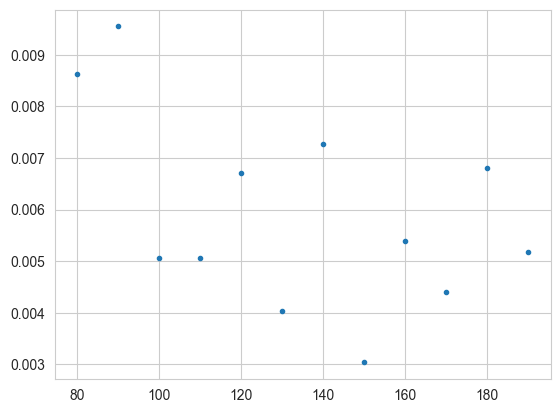

In [43]:
r = 50

N = np.arange(80, 200, 10)
T_K = []
for n in N:
    T_K.append(T_k(n, r))
plt.plot(N, T_K, '.')
ax.title('T_K(n) при r=50')
plt.xlabel('n', fontsize=15)
plt.ylabel('T_K(n)', fontsize=15)
plt.show()


r = 70

N = np.arange(80, 200, 10)
T_K = []
for n in N:
    T_K.append(T_k(n, r))
plt.plot(N, T_K, '.')
ax.title('T_K(n) при r=70')
plt.xlabel('n', fontsize=15)
plt.ylabel('T_K(n)', fontsize=15)
plt.show()

r = 100

N = np.arange(100, 200, 10)
T_K = []
for n in N:
    T_K.append(T_k(n, r))
plt.plot(N, T_K, '.')
ax.title('T_K(n) при r=100')
plt.xlabel('n', fontsize=15)
plt.ylabel('T_K(n)', fontsize=15)
plt.show()

## *** Задача 3: распределение порядковых статистик (4 балла).***


### **1.** Зафиксируйте $n \in \mathbb{N}$ и натуральное $r$ от $1$ до $n$.

In [44]:
n = 100

### **2.** Сгенерируйте $K = n^2$ выборок $\left( X_1^k, ... , X_n^k \right)$, $1 \le k \le K$, объёма $n$ из равномерного распределения на отрезке $\left[ 0, 1 \right]$. В каждой из $K$ выборок определить $r$-ую порядковую статистику $X_{(r)}^k$.

In [45]:
r = 70

K = n ** 2
left, right = 0, 1
samples = []
for i in range(K):
    sample = np.random.uniform(left, right, n)
    samples.append(sample)

for i in range(K):
    samples[i] = sorted(samples[i])

r_order_statistics = []
for i in range(K):
    r_order_statistics.append(samples[i][r - 1])


### **3.**  По набору наблюдений $X_{(r)}^1, ... , X_{(r)}^K$ постройте гистограмму. На тот же рисунок добавьте график плотности распределения $\operatorname{Beta}(r, n + 1 - r)$.

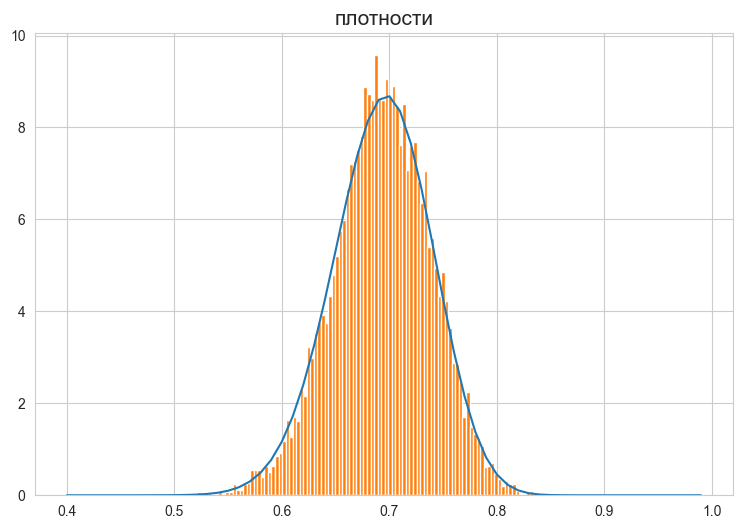

In [48]:
fig, ax = plt.subplots(figsize=(9, 6))
X = np.arange(0.4, 1.0, 0.01)
plt.plot(X, beta.pdf(X, r, n + 1 - r))

ax.set_title('плотности', fontsize=15)
plt.hist(r_order_statistics, bins=100, density=True)

plt.show()

### **4.** Убедитесь, что эмпирическая функция распределения \begin{equation} \hat F_K(t) = \cfrac{1}{K} \sum\limits_{k = 1}^{K}\mathbb{1}\left( X_{(r)}^k \le t \right), \;\;\; t \in [0, 1] \end{equation} близка к функции распределения $\operatorname{Beta}(r, n + 1 − r)$. Для этого вычислите \begin{equation} T_K = \operatorname{sup}_{t \ge 0} \left| \hat F_K(t) - G_{r, n+1-r}(t) \right|, \end{equation} где $G_{r, n + 1 - r}$  - функция распределения $\operatorname{Beta}(r, n + 1 - r)$ (доступна в библиотеке scipy). Обратите внимание, что $\hat F_K$ - кусочно постоянная функция, а $G_{r, n+1-r}$ - монотонная. Поэтому значение статистики $T_K$ можно найти точно.

0.011042085546933422


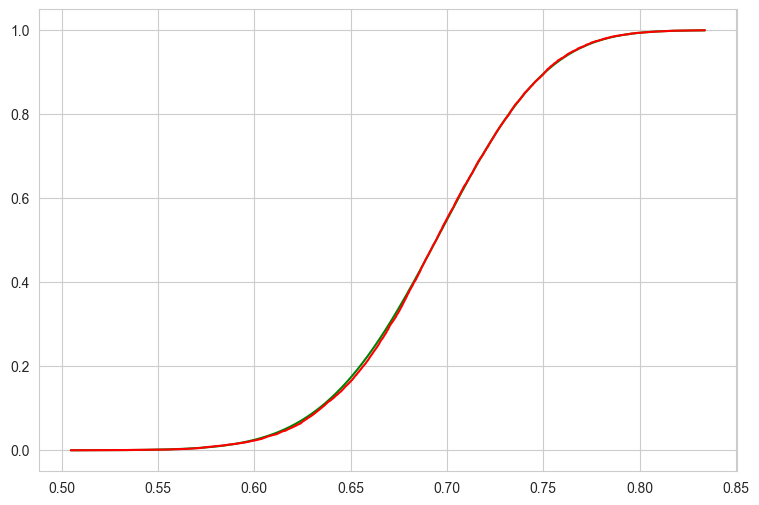

In [49]:
F_x = []
x = sorted(r_order_statistics)

for i in range(len(x)):
    F_x.append(i / K)

fig, ax = plt.subplots(figsize=(9, 6))

plt.plot(x, beta.cdf(x, r, n + 1 - r), color='green')
plt.plot(x, F_x, color='red')

T_k = 0
for i in range(len(x)):
    T_k = max(T_k, abs(F_x[i] - beta.cdf(x[i], r, n + 1 - r)))
print(T_k)

### **5.** Повторите задания пп. 1, 2, 4 при различных значениях $r$ и $n$. При каждом $r$ постройте график зависимости $T_K$ от $n$. Убедитесь, что значение $T_K$ стремится к нулю с ростом $r$. Необходимо выбрать не менее трех различных значений $r$ и не менее $10$ различных значений $n$. Гистограмму (см. п. 3) можно построить при одном фиксированном значении $n$ на Ваш выбор.